<a href="https://colab.research.google.com/github/AI-Junction/Lung-Cancer-Detection/blob/master/LungCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

#filename = "/content/.kaggle/kaggle.json"
#filename = "/.kaggle/kaggle.json"
filename = "kaggle.json"
#os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
!ls -lha kaggle.json

---x-wx--T 1 root root 65 Jan 14 15:39 kaggle.json


In [0]:
os.path.isdir("/root/.kaggle")

False

In [0]:
dir_kaggle = "/root/.kaggle"
if not os.path.isdir(dir_kaggle):
  !mkdir -p ~/.kaggle  
!cp kaggle.json ~/.kaggle/
os.path.isdir(dir_kaggle)

True

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! pip install dicom

    100% |████████████████████████████████| 768kB 6.2MB/s 


In [0]:
import seaborn as sns
p = sns.color_palette()

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



#dsb_data_dir = "drive/My Drive/All ML Datasets/AllLuna16Data"

/usr/local/lib/python3.6/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [0]:
!cp -r '/content/drive/My Drive/All ML Datasets/AllLuna16Data' '/content/'

In [0]:
dsb_data_dir = "/content/AllLuna16Data"

In [0]:
def plot_3d(image, threshold=-300):

    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    #p = first_patient_pixels.transpose(2,1,0)
    
    p = pix_resampled.transpose(2,1,0)
    verts, faces, norm, val  = measure.marching_cubes(p, threshold)
    
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    plt.show()


In [0]:
def largest_label_volume(im, bg=-1):
    vals, counts = np.unique(im, return_counts=True)

    counts = counts[vals != bg]
    vals = vals[vals != bg]

    if len(counts) > 0:
        return vals[np.argmax(counts)]
    else:
        return None


In [0]:
#INPUT_FOLDER = os.getcwd()
#print(INPUT_FOLDER)
path = os.path.join(dsb_data_dir, "R_004/06-30-1997-Diagnostic Pre-Surgery Contrast Enhanced CT-71813/3- NONE -29295")
patients = os.listdir(path)
print(patients)
patients.sort()


['000009.dcm', '000066.dcm', '000011.dcm', '000022.dcm', '000057.dcm', '000003.dcm', '000036.dcm', '000067.dcm', '000017.dcm', '000055.dcm', '000053.dcm', '000020.dcm', '000032.dcm', '000052.dcm', '000054.dcm', '000041.dcm', '000042.dcm', '000064.dcm', '000005.dcm', '000035.dcm', '000065.dcm', '000038.dcm', '000025.dcm', '000021.dcm', '000024.dcm', '000029.dcm', '000045.dcm', '000008.dcm', '000039.dcm', '000013.dcm', '000000.dcm', '000046.dcm', '000027.dcm', '000060.dcm', '000030.dcm', '000031.dcm', '000058.dcm', '000002.dcm', '000063.dcm', '000043.dcm', '000034.dcm', '000023.dcm', '000059.dcm', '000051.dcm', '000033.dcm', '000012.dcm', '000062.dcm', '000007.dcm', '000050.dcm', '000010.dcm', '000006.dcm', '000026.dcm', '000001.dcm', '000015.dcm', '000061.dcm', '000019.dcm', '000018.dcm', '000037.dcm', '000044.dcm', '000048.dcm', '000016.dcm', '000056.dcm', '000004.dcm', '000049.dcm', '000047.dcm', '000040.dcm', '000014.dcm', '000028.dcm']


In [0]:
slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
y = [x.ImagePositionPatient for x in slices]
print(y)

print(len(slices))



[['-209.400', '-223.900', '-56.750'], ['-209.400', '-223.900', '-331.750'], ['-209.400', '-223.900', '-51.750'], ['-209.400', '-223.900', '-121.750'], ['-209.400', '-223.900', '-266.750'], ['-209.400', '-223.900', '-11.750'], ['-209.400', '-223.900', '-186.750'], ['-209.400', '-223.900', '-326.750'], ['-209.400', '-223.900', '-71.750'], ['-209.400', '-223.900', '-271.750'], ['-209.400', '-223.900', '-226.750'], ['-209.400', '-223.900', '-111.750'], ['-209.400', '-223.900', '-171.750'], ['-209.400', '-223.900', '-241.750'], ['-209.400', '-223.900', '-276.750'], ['-209.400', '-223.900', '-216.750'], ['-209.400', '-223.900', '-191.750'], ['-209.400', '-223.900', '-311.750'], ['-209.400', '-223.900', '-36.750'], ['-209.400', '-223.900', '-136.750'], ['-209.400', '-223.900', '-301.750'], ['-209.400', '-223.900', '-156.750'], ['-209.400', '-223.900', '-116.750'], ['-209.400', '-223.900', '-66.750'], ['-209.400', '-223.900', '-131.750'], ['-209.400', '-223.900', '-151.750'], ['-209.400', '-22

In [0]:
print("look at attributes of slices")
print("============================")
q = [x for x in dir(slices)]
print(dir(slices))

print("\n look at attributes of individual slice")
print("============================")
print([y for y in dir(slices[0])])

print('AcquisitionNumber',slices[0].AcquisitionNumber)
print('BitsAllocated',slices[0].BitsAllocated)
print('BitsStored',slices[0].BitsStored)
print('Columns',slices[0].Columns)
print('FrameOfReferenceUID', slices[0].FrameOfReferenceUID)
print('HighBit',slices[0].HighBit)
print('ImageOrientationPatient',slices[0].ImageOrientationPatient)
print('ImagePositionPatient',slices[0].ImagePositionPatient)
print('InstanceNumber',slices[0].InstanceNumber)
print('KVP',slices[0].KVP)
print('Modality',slices[0].Modality)
print('PatientBirthDate',slices[0].PatientBirthDate)
print('PatientID',slices[0].PatientID)
print('PatientName',slices[0].PatientName)
print('PatientOrientation',slices[0].PatientOrientation)
print('PhotometricInterpretation',slices[0].PhotometricInterpretation)
print('PixelData length',len(slices[0].PixelData))
print('PixelPaddingValue',slices[0].PixelPaddingValue)
print('PixelRepresentation',slices[0].PixelRepresentation)
print('PixelSpacing',slices[0].PixelSpacing)
print('PositionReferenceIndicator',slices[0].PositionReferenceIndicator)
print('RescaleIntercept',slices[0].RescaleIntercept)
print('RescaleSlope',slices[0].RescaleSlope)
print('Rows',slices[0].Rows)
print('SOPClassUID',slices[0].SOPClassUID)
print('SOPInstanceUID',slices[0].SOPInstanceUID)
print('SamplesPerPixel',slices[0].SamplesPerPixel)
print('SeriesDescription',slices[0].SeriesDescription)
print('SeriesInstanceUID',slices[0].SeriesInstanceUID)
print('SeriesNumber',slices[0].SeriesNumber)
print('SliceLocation',slices[0].SliceLocation)
print('SpecificCharacterSet',slices[0].SpecificCharacterSet)
print('StudyInstanceUID',slices[0].StudyInstanceUID)
print('WindowCenter',slices[0].WindowCenter)
print('WindowWidth',slices[0].WindowWidth)


look at attributes of slices
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']

 look at attributes of individual slice
['AccessionNumber', 'AcquisitionDate', 'AcquisitionNumber', 'AcquisitionTime', 'AdditionalPatientHistory', 'AdmittingDiagnosesDescription', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'ConvolutionKernel', 'DataCollectionDiameter', 'DeidentificationMethod', 'DeidentificationMethodCodeSequence', 'DerivationDescription',

In [0]:
slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
try:
    slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
except:
    slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)


In [0]:
for s in slices:
        s.SliceThickness = slice_thickness
        
first_patient = slices

print(slices[0])

print(slices[0].pixel_array.shape)


(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19970630'
(0008, 0013) Instance Creation Time              TM: '170139'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4320.5030.301588093915295674168880116065
(0008, 0020) Study Date                          DA: '19970630'
(0008, 0021) Series Date                         DA: '19970630'
(0008, 0022) Acquisition Date                    DA: '19970630'
(0008, 0023) Content Date                        DA: '19970630'
(0008, 0030) Study Time                          TM: '165846.0000'
(0008, 0031) Series Time                         TM: '170035.0000'
(0008, 0032) Acquisition Time                    TM: '170054'
(0008, 0033) Content Time                        TM: '170139'
(0008, 0050) Accessi

In [0]:
image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
image[image == -2000] = 0


In [0]:
    # Convert to Hounsfield units (HU)
for slice_number in range(len(slices)):
        
    intercept = slices[slice_number].RescaleIntercept
    slope = slices[slice_number].RescaleSlope
        
    if slope != 1:
        image[slice_number] = slope * image[slice_number].astype(np.float64)
        image[slice_number] = image[slice_number].astype(np.int16)
            
    image[slice_number] += np.int16(intercept)


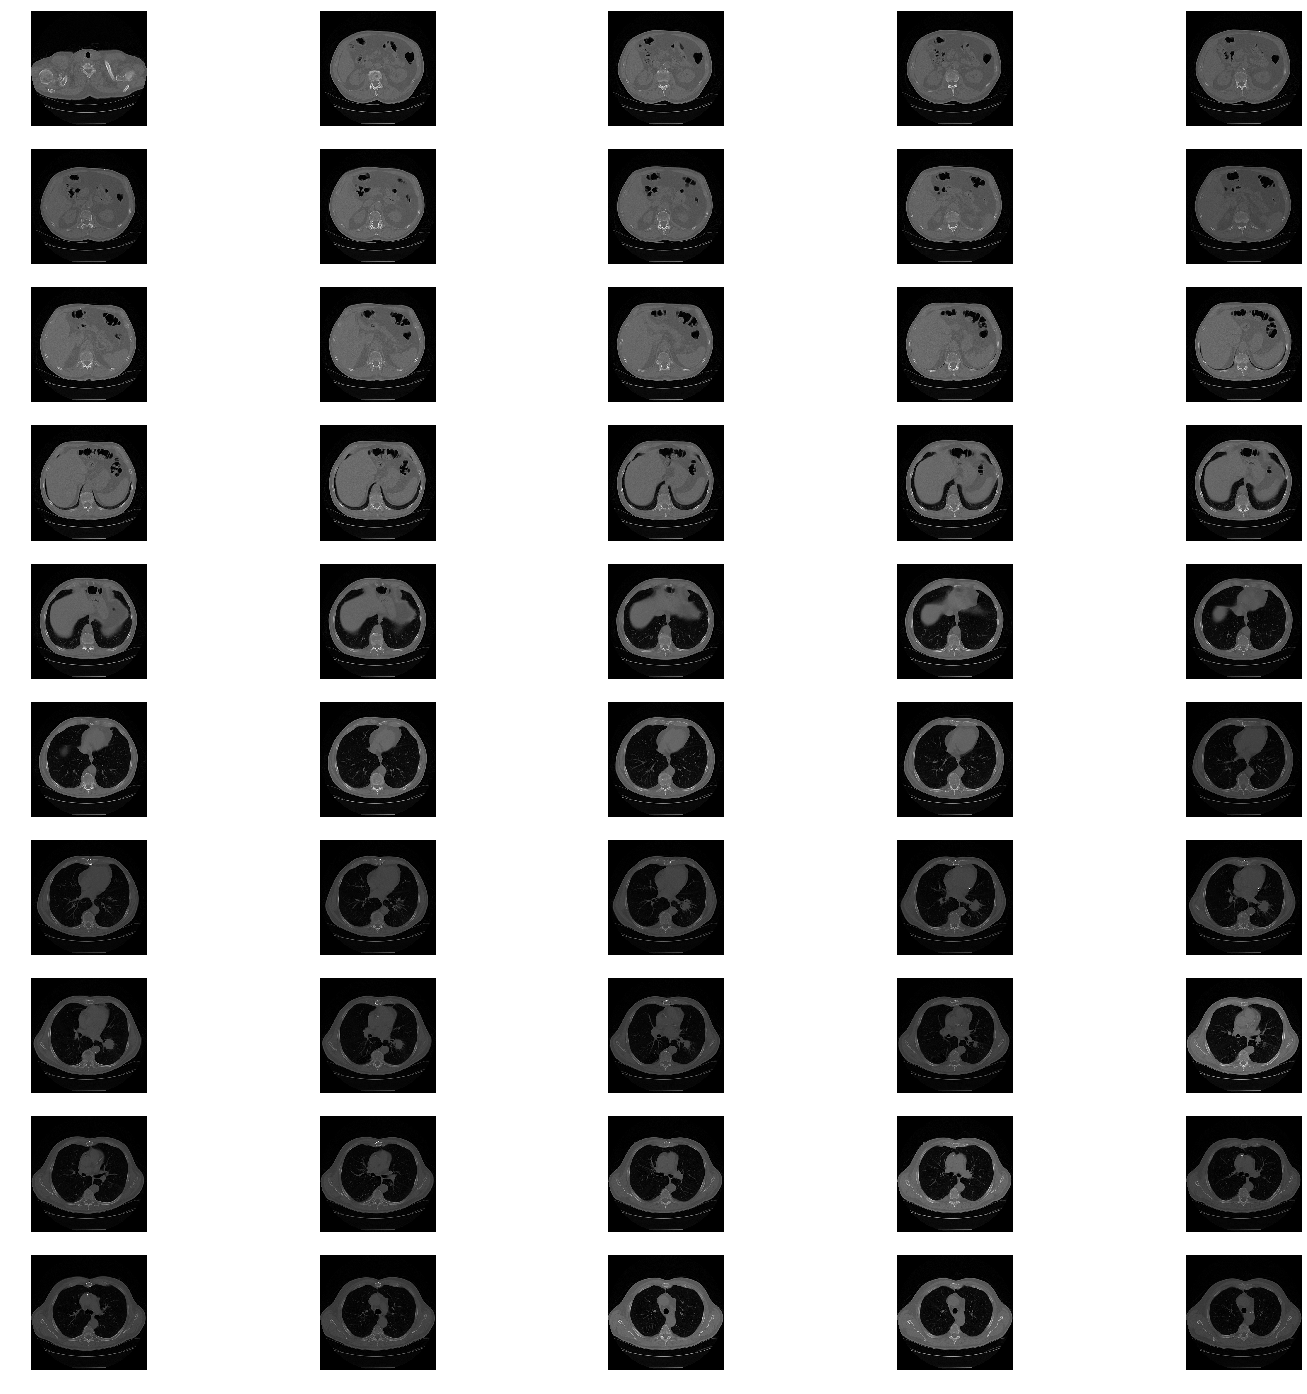

In [0]:
first_patient_pixels = np.array(image, dtype=np.int16)


f, ax = plt.subplots(10,5, figsize=(25,25))

axes = ax.flat

for i, x in enumerate(axes):
    x.imshow(first_patient_pixels[i-1], cmap=plt.cm.gray)
    x.axis("off")

plt.show()


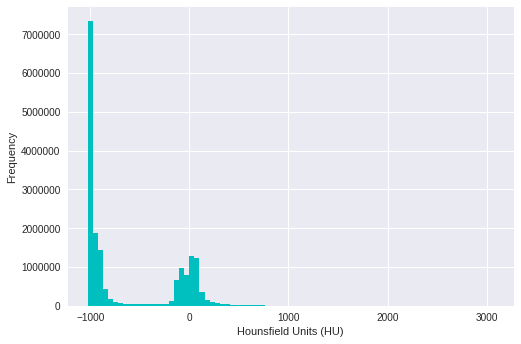

In [0]:
fig = plt.figure()
plt.hist(first_patient_pixels.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()


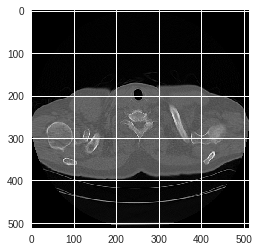

In [0]:
# Show some slice in the middle
fig = plt.figure()
plt.imshow(first_patient_pixels[67], cmap=plt.cm.gray)
plt.show()


In [0]:
print(first_patient[0].SliceThickness)

print(first_patient[0].PixelSpacing)

print(first_patient_pixels.shape)



print(len(first_patient))
print(first_patient[0].pixel_array.shape)
print(type(first_patient))

print(len(first_patient_pixels))
print(first_patient_pixels.shape)
print(type(first_patient_pixels))


5.0
['0.830078', '0.830078']
(68, 512, 512)
68
(512, 512)
<class 'list'>
68
(68, 512, 512)
<class 'numpy.ndarray'>


In [0]:
image = first_patient_pixels
scan = first_patient
new_spacing=[1,1,1]


spacing = np.hstack([[first_patient[0].SliceThickness], first_patient[0].PixelSpacing])
spacing = np.array(spacing, dtype=np.float32)
print(spacing)
print(type(spacing))

resize_factor = spacing / new_spacing
print(resize_factor, spacing, new_spacing)


new_real_shape = image.shape * resize_factor
print(new_real_shape)


new_shape = np.round(new_real_shape)
print(new_shape)

real_resize_factor = new_shape / image.shape
print(real_resize_factor)


new_spacing = spacing / real_resize_factor
print(new_spacing)


image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
pix_resampled, spacing = image, new_spacing


print(pix_resampled.shape)
print(spacing)


print("Shape before resampling\t", first_patient_pixels.shape)
print("Shape after resampling\t", pix_resampled.shape)


[5.       0.830078 0.830078]
<class 'numpy.ndarray'>
[5.         0.83007801 0.83007801] [5.       0.830078 0.830078] [1, 1, 1]
[340.         424.99993896 424.99993896]
[340. 425. 425.]
[5.         0.83007812 0.83007812]
[1.         0.99999986 0.99999986]
(340, 425, 425)
[1.         0.99999986 0.99999986]
Shape before resampling	 (68, 512, 512)
Shape after resampling	 (340, 425, 425)


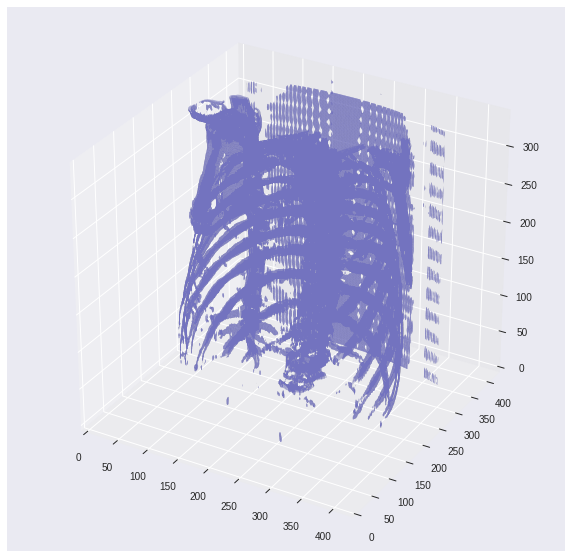

In [0]:
plot_3d(pix_resampled, 400)    

In [0]:
image = pix_resampled
print(np.unique(image))
fill_lung_structures=True
# not actually binary, but 1 and 2. 
# 0 is treated as background, which we do not want
binary_image = np.array(image > -320, dtype=np.int8)+1
print(binary_image.shape)
print(image.shape)




In [0]:
print(np.unique(binary_image))
print(np.unique(image))


labels = measure.label(binary_image)
print(len([x.shape for x in labels]))

print(len(np.unique(labels)))
#print(labels[1,1,1])
print(binary_image[labels == 100])
    
# Pick the pixel in the very corner to determine which label is air.
#   Improvement: Pick multiple background labels from around the patient
#   More resistant to "trays" on which the patient lays cutting the air 
#   around the person in half
background_label = labels[0,0,0]
print(background_label)

    
#Fill the air around the person
binary_image[background_label == labels] = 2
z = measure.label(binary_image)
print(len(np.unique(z)))
print(binary_image[z == 100])
    



In [0]:
for i, x in enumerate(binary_image):
    print(i,x.shape)
    print(np.unique(measure.label(x-1), return_counts=True))
    #print(measure.label(x-1)[0].shape)
    #print(measure.label(x-1)[1].shape)
    
    
    


In [0]:
# Method of filling the lung structures (that is superior to something like 
# morphological closing)
if fill_lung_structures:
    # For every slice we determine the largest solid structure
    for i, axial_slice in enumerate(binary_image):
        axial_slice = axial_slice - 1
        labeling = measure.label(axial_slice)

        #####
        im = labeling
        bg = 0
        vals, counts = np.unique(im, return_counts=True)
        print(vals,counts)
        counts = counts[vals != bg]
        vals = vals[vals != bg]

        if len(counts) > 0:
            l_max = vals[np.argmax(counts)]
        else:
            l_max = None        
        
        #####
        
        if l_max is not None: #This slice contains some lung
            binary_image[i][labeling != l_max] = 1

    


In [0]:
binary_image -= 1 #Make the image actual binary
binary_image = 1-binary_image # Invert it, lungs are now 1
    
# Remove other air pockets insided body
labels = measure.label(binary_image, background=0)
l_max = largest_label_volume(labels, bg=0)
if l_max is not None: # There are air pockets
    binary_image[labels != l_max] = 0
 
segmented_lungs = binary_image


plot_3d(segmented_lungs, 0)








In [0]:
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices





In [0]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)







In [0]:
def resample(image, scan, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    #spacing = np.array(np.array(scan[0].SliceThickness) + np.array(scan[0].PixelSpacing[0]), dtype=np.float32)

    spacing = np.hstack([[scan[0].SliceThickness], scan[0].PixelSpacing])
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
    
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    
    return image, new_spacing



pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1,1,1])
print("Shape before resampling\t", first_patient_pixels.shape)
print("Shape after resampling\t", pix_resampled.shape)




    
    






In [0]:
def segment_lung_mask(image, fill_lung_structures=True):
    
    # not actually binary, but 1 and 2. 
    # 0 is treated as background, which we do not want
    binary_image = np.array(image > -320, dtype=np.int8)+1
    labels = measure.label(binary_image)
    
    # Pick the pixel in the very corner to determine which label is air.
    #   Improvement: Pick multiple background labels from around the patient
    #   More resistant to "trays" on which the patient lays cutting the air 
    #   around the person in half
    background_label = labels[0,0,0]
    
    #Fill the air around the person
    binary_image[background_label == labels] = 2
    
    
    # Method of filling the lung structures (that is superior to something like 
    # morphological closing)
    if fill_lung_structures:
        # For every slice we determine the largest solid structure
        for i, axial_slice in enumerate(binary_image):
            axial_slice = axial_slice - 1
            labeling = measure.label(axial_slice)
            l_max = largest_label_volume(labeling, bg=0)
            
            if l_max is not None: #This slice contains some lung
                binary_image[i][labeling != l_max] = 1

    
    binary_image -= 1 #Make the image actual binary
    binary_image = 1-binary_image # Invert it, lungs are now 1
    
    # Remove other air pockets insided body
    labels = measure.label(binary_image, background=0)
    l_max = largest_label_volume(labels, bg=0)
    if l_max is not None: # There are air pockets
        binary_image[labels != l_max] = 0
 
    return binary_image



In [0]:
segmented_lungs = segment_lung_mask(pix_resampled, False)
segmented_lungs_fill = segment_lung_mask(pix_resampled, True)


plot_3d(segmented_lungs_fill, 0)
plot_3d(segmented_lungs_fill - segmented_lungs, 0)




